<a href="https://colab.research.google.com/github/alinemls/datasets/blob/main/Iris_Decision_Tree_Testev14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de Bibliotecas

In [211]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from scipy.stats import randint
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, cohen_kappa_score as kappa, confusion_matrix, classification_report
from IPython.display import Image
%matplotlib inline

## Carregamento da Base

In [212]:
df = pd.read_csv('https://raw.githubusercontent.com/alinemls/datasets/main/iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [213]:
df.drop(labels=['Id'], axis=1, inplace=True, errors='ignore')

In [214]:
#df.head(5)

In [215]:
# Agrupamento pela identificação completa da planta
#df.groupby('variety').size()

##Preparação de Dados

In [216]:
idCat,Cat = pd.factorize(df["variety"])
idCat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [217]:
df['varietyCat']=idCat

In [218]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety,varietyCat
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0


In [219]:
del df["variety"]

In [220]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,varietyCat
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Análise Exploratória

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   varietyCat    150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [222]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,varietyCat
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


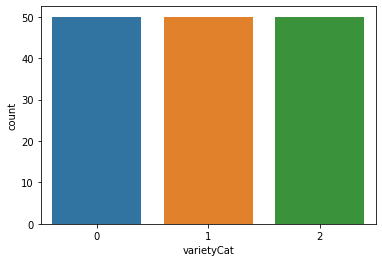

In [223]:
sns.countplot(df["varietyCat"])

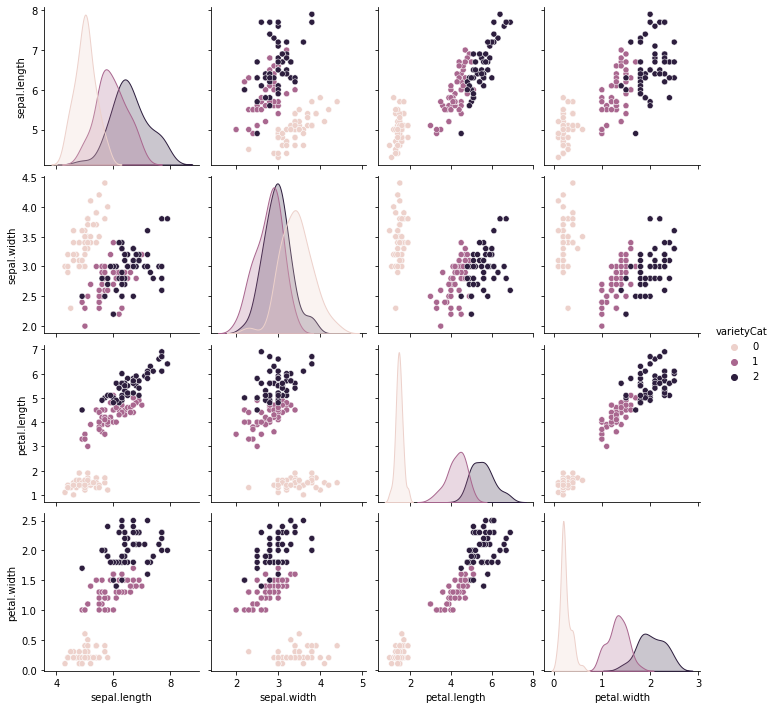

In [224]:
sns.pairplot(df,hue="varietyCat")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


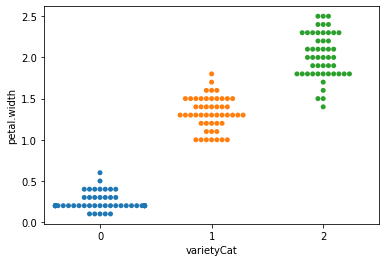

In [225]:
sns.swarmplot (x="varietyCat",y="petal.width",data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


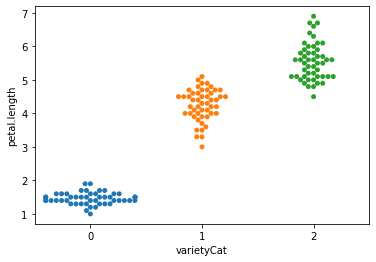

In [226]:
sns.swarmplot (x="varietyCat",y="petal.length",data=df)

##Agrupamento

In [227]:
idCat,Cat = pd.factorize(df["varietyCat"])
idCat
df['varietyCat']=idCat

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   varietyCat    150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [229]:
df['varietyCat'].value_counts()

0    50
1    50
2    50
Name: varietyCat, dtype: int64

In [230]:
clf = KMeans()
clf.fit(df)
clf.labels_

array([3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 5, 5, 5, 2, 5, 2, 5, 6, 5, 2, 6, 2, 2, 5, 2, 5,
       2, 2, 5, 2, 5, 2, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 2, 5, 2, 5, 5, 5,
       2, 2, 2, 5, 2, 6, 2, 2, 2, 5, 6, 2, 7, 1, 7, 7, 7, 4, 1, 4, 7, 4,
       7, 1, 7, 1, 1, 7, 7, 4, 4, 1, 7, 1, 4, 1, 7, 4, 1, 1, 7, 7, 4, 4,
       7, 1, 1, 4, 7, 7, 1, 7, 7, 7, 1, 7, 7, 7, 1, 7, 7, 1], dtype=int32)

In [231]:
print(classification_report(df['varietyCat'],clf.labels_))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.11       150
   macro avg       0.12      0.04      0.06       150
weighted avg       0.33      0.11      0.17       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [232]:
print(confusion_matrix(df['varietyCat'],clf.labels_))

[[17  0  0 33  0  0  0  0]
 [ 0  0 20  0  0 23  7  0]
 [ 0 16  0  0 10  0  0 24]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


##Divisão dos Dados em Treino e Teste

In [233]:
X=df.drop("varietyCat",axis=1)
y=df["varietyCat"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [234]:
X_train.shape

(120, 4)

In [235]:
y_train.shape

(120,)

##Definição dos Hiperparâmetros

In [236]:
params = [
      {
        'criterion':['gini','entropy'],
        'max_depth':[None,2,4,8,10,30,50,100]  
      }
]
clf = DecisionTreeClassifier(max_depth=8)
grid_search = GridSearchCV(clf,params,scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 50}

##Previsões

In [237]:
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
pred[:10]

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0])

In [238]:
y_test[:10]

128    2
11     0
118    2
15     0
123    2
135    2
32     0
1      0
116    2
45     0
Name: varietyCat, dtype: int64

##Medições de Desempenho

In [239]:
print("Acurácia: %.2f" % (clf.score(X_test,y_test)))

Acurácia: 0.97


In [240]:
clf.score(X_test,y_test)

0.9666666666666667

In [241]:
print("Coeficiente de Kappa: %.2f" % (kappa(y_test, clf.predict(X_test))) )

Coeficiente de Kappa: 0.95


In [242]:
cross = cross_val_score(clf,X_test,y_test,scoring="accuracy")
final = sum(cross) / len(cross)
final

0.9333333333333333

In [243]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91         6
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [244]:
print(confusion_matrix(y_test,pred))

[[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


##Árvore de Decisão

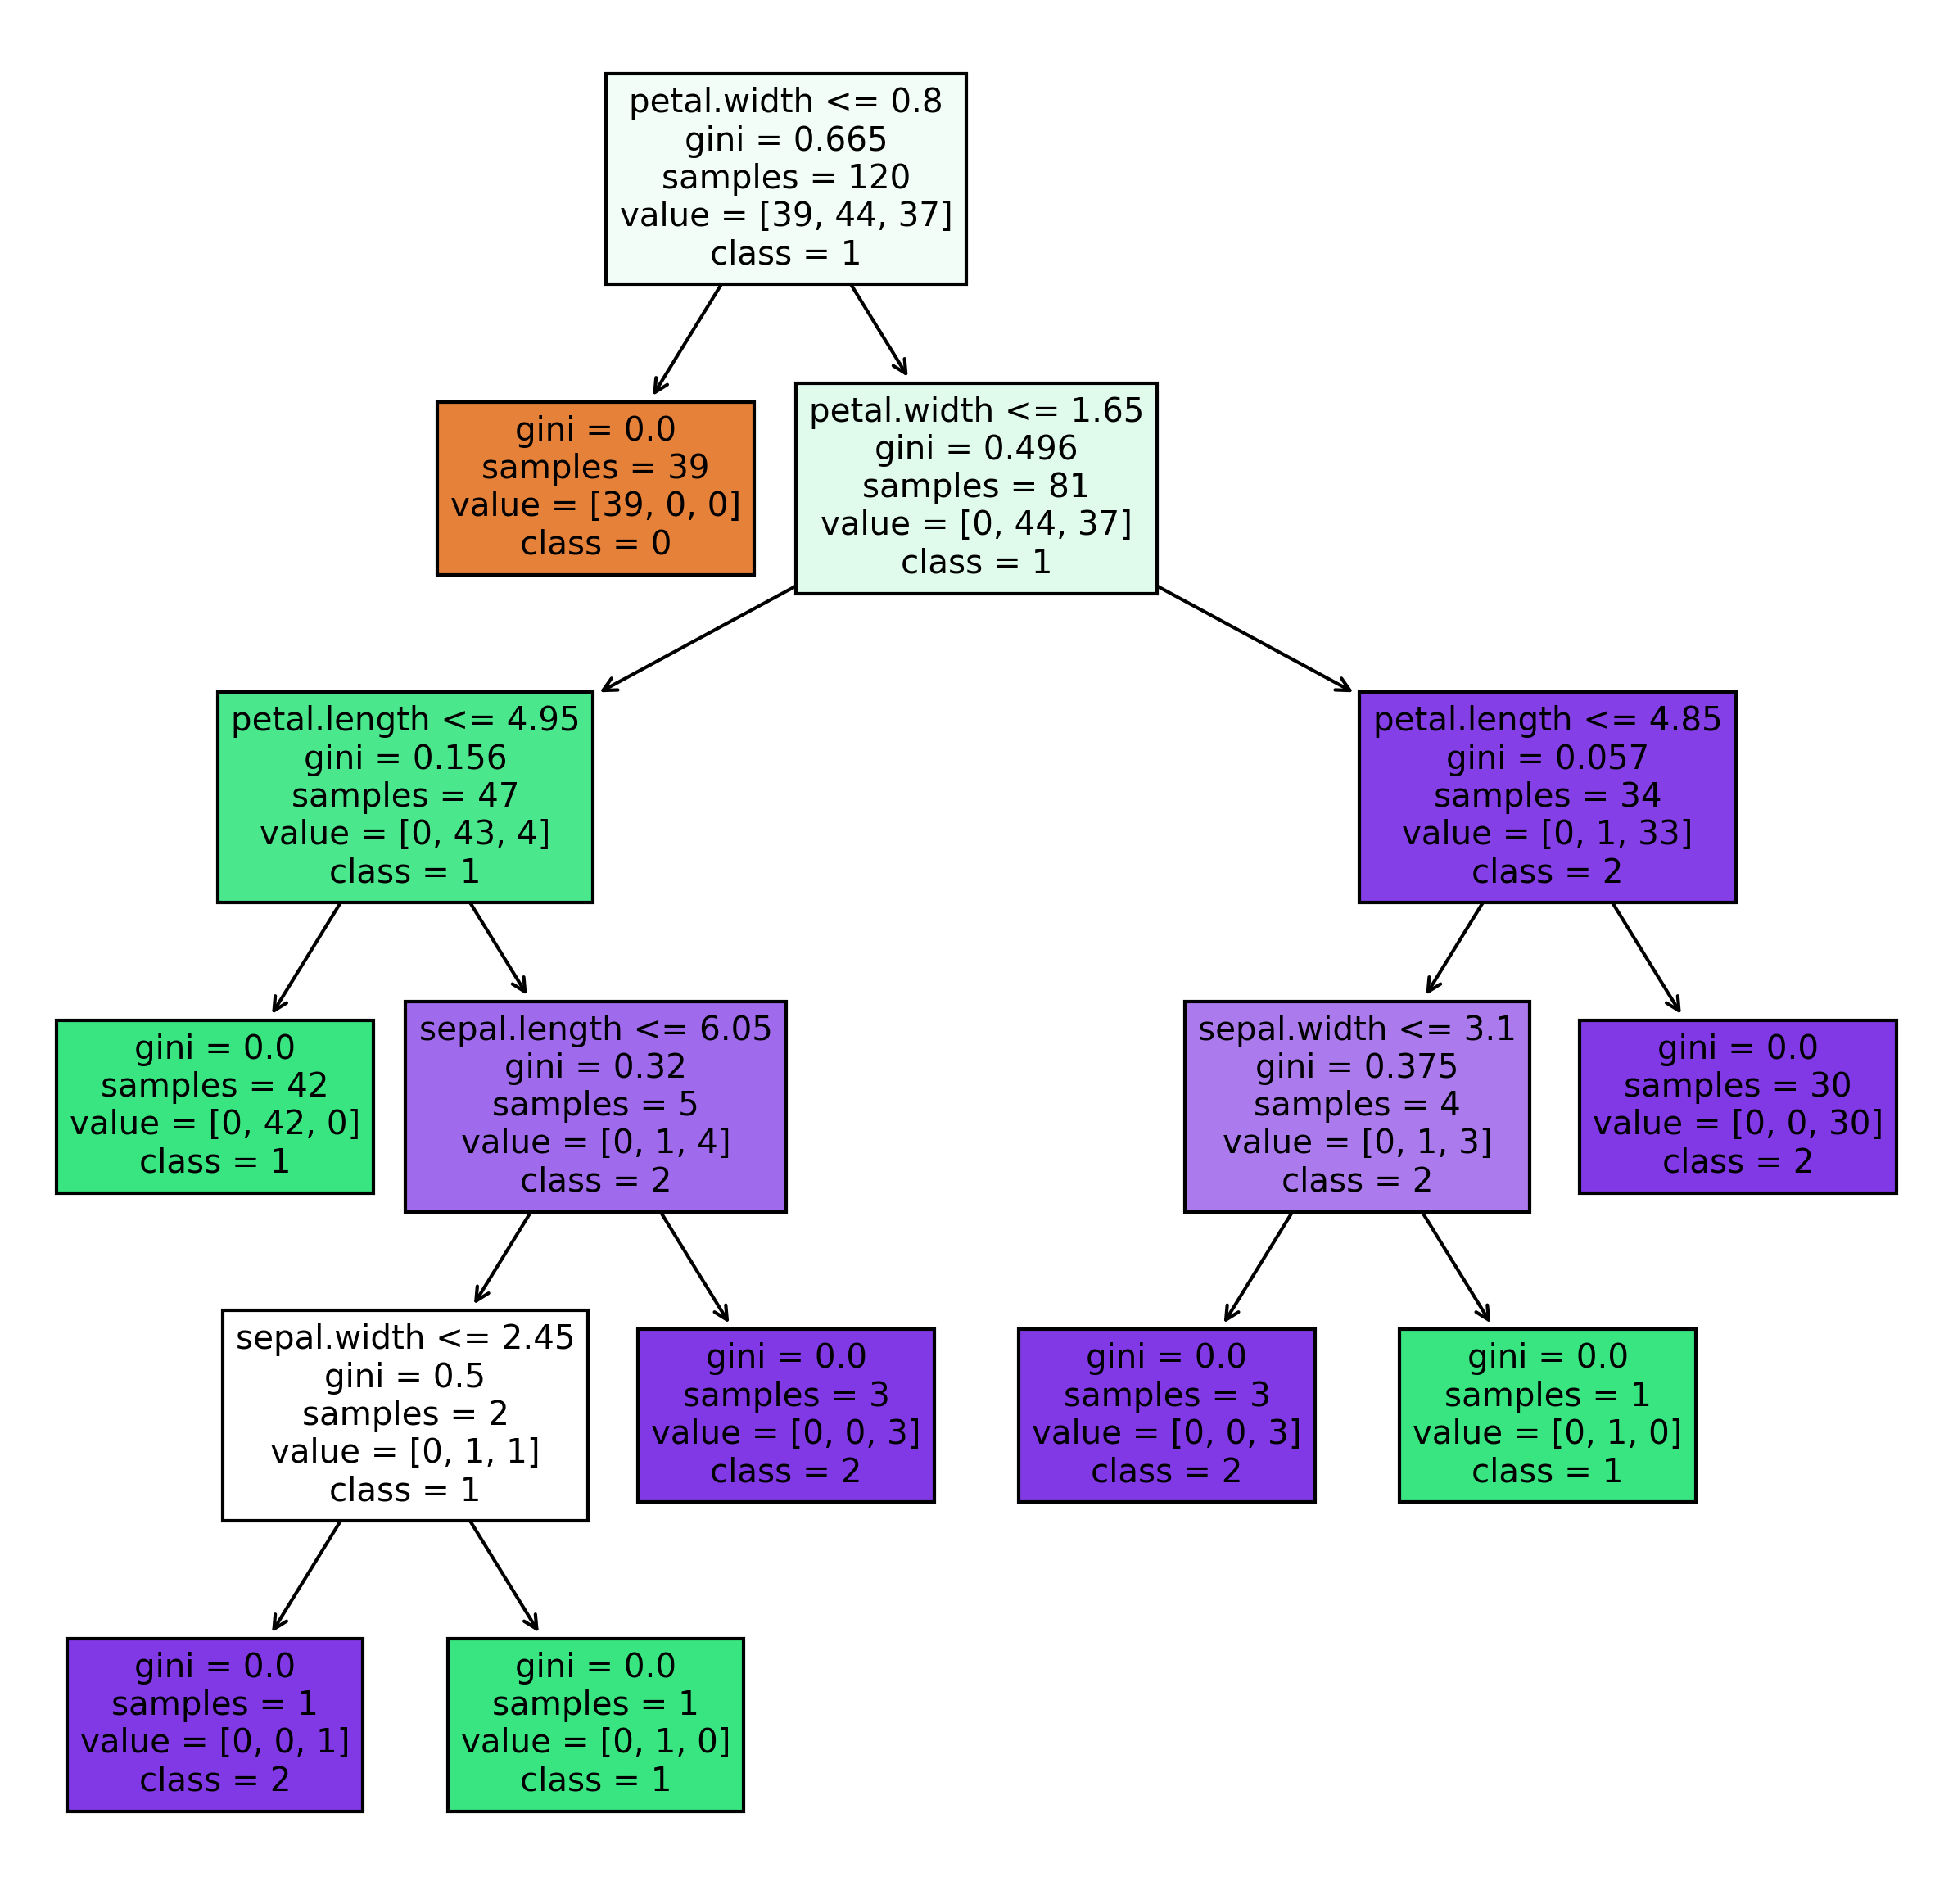

In [245]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf,
               feature_names = df.columns, 
               class_names=['0','1','2'],
               #class_names=df.varietyCat,
               filled = True
               );
#Image("tree.png",width=400)

##Extração das Regras de Produção

In [246]:
!pip install graphviz

In [247]:
import graphviz

In [248]:
df.columns.drop('varietyCat')

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width'], dtype='object')

In [249]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=df.columns.drop('varietyCat'),  
                      class_names=['0','1','2'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render(filename="iris", view=True, format='png')

'iris.png'

In [250]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
print(r)

|--- Petal_Width <= 0.80
|   |--- class: 0
|--- Petal_Width >  0.80
|   |--- Petal_Width <= 1.65
|   |   |--- Petal_Length <= 4.95
|   |   |   |--- class: 1
|   |   |--- Petal_Length >  4.95
|   |   |   |--- Sepal_Length <= 6.05
|   |   |   |   |--- Sepal_Width <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Sepal_Width >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- Sepal_Length >  6.05
|   |   |   |   |--- class: 2
|   |--- Petal_Width >  1.65
|   |   |--- Petal_Length <= 4.85
|   |   |   |--- Sepal_Width <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- Sepal_Width >  3.10
|   |   |   |   |--- class: 1
|   |   |--- Petal_Length >  4.85
|   |   |   |--- class: 2



##Relevância dos Atributos

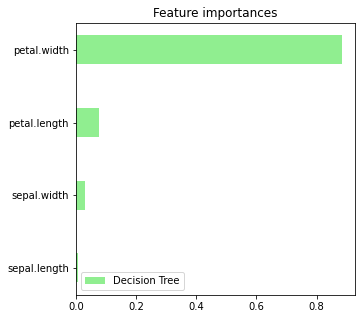

In [251]:
feature_importance=pd.DataFrame({
    #'rfc':clf_rf.feature_importances_,
    'dt':clf.feature_importances_
},index=df.drop(columns=['varietyCat']).columns)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig,ax = plt.subplots(figsize=(5,5))
#rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
ax.set_title("Feature importances")
ax.legend()
plt.show()